In [1]:
import time
import random
import math
import array
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.axes
from matplotlib.offsetbox import AnchoredText
import numpy as np
import pyvisa as visa
import os
from AutoCircleCopyRS import move_circle
from move_by_XY import moveXY
from CenterPiezoRS import center_piezo
from GrabLocation import grab_location
import config_constants as cc
import cv2
import sys
import usb.core
import usb.util
from Waveform_autotest import auto_test
import smtplib
from email.mime.text import MIMEText

<IPython.core.display.Javascript object>

In [2]:
def send_email(subject, body, sender, recipients, password):
    msg = MIMEText(body)
    msg['Subject'] = subject
    msg['From'] = sender
    msg['To'] = ', '.join(recipients)
    smtp_server = smtplib.SMTP_SSL('smtp.gmail.com', 465)
    smtp_server.login(sender, password)
    smtp_server.sendmail(sender, recipients, msg.as_string())
    smtp_server.quit()

In [3]:
freqs = [10,5,1,0.1,0.01,0.005]
amps = [1.5]

#run test for all of the combinations given above
for j in range(0,len(amps)):
    amp = amps[j]
    for i in range(0,len(freqs)):
        freq = freqs[i]
        time = 2
        xcoords, ycoords, x0coords, y0coords = auto_test(channel = 1, symm = 100, voltage = amp, freq = freq, duration = time, trials = 25)

        print("Results for",amp,freq,"\/ \/ \/ \/ \/")
        distancex = []
        for i in range(len(x0coords)):
            result = xcoords[i] - x0coords[i]
            distancex.append(result)
        print(distancex)
        distx = np.mean(distancex)*1000
        print(distx)
        
        distancey = []
        for i in range(len(y0coords)):
            result = ycoords[i] - y0coords[i]
            distancey.append(result)
        print(distancey)
        disty = np.mean(distancey)*1000
        print(disty)
        
        thetax = np.arctan(np.mean(distancey)/np.mean(distancex))*180/np.pi
        print(thetax)
        thetay = np.arctan(np.mean(distancex)/np.mean(distancey))*180/np.pi
        print(thetay)
        
        dict = {'Freq': [freq], 'Amp': [amp], 'Time': [time], 'Dist x': [distx], 'Dist y': [disty], 'Angle x': [thetax], 'Angle y': [thetay]}
        df = pd.DataFrame(dict)
        df.to_csv('.\Results\Cache.csv', mode='a', index=False, header=False)
        
#send an email when the test is complete
subject = "AutoTest complete!"
body = "This is a notification that your test sequence has concluded :)"
sender = "3214lab@gmail.com"
password = "ebdzhrzhhpysfpjb"
recipients = ["rsebok@umich.edu"]

send_email(subject, body, sender, recipients, password)

<IPython.core.display.Javascript object>

0.018874649047852188 -0.02114350891113226
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

1
0.7611018218994143 -0.14720361328125087
posX 4.0 Vpp 0.4727340508692014 s
Configuring C1
Move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

2
0.9035521545410159 -0.21642549133300726
posX 4.0 Vpp 0.5612125183484571 s
Configuring C1
Move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

3
0.8618945159912101 -0.19675309753417913
posX 4.0 Vpp 0.5353382086901926 s
Configuring C1
Move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

4
0.8514369049072261 -0.17645928955078105
posX 4.0 Vpp 0.5288427980790225 s
Configuring C1
Move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

5
0.8354552307128902 -0.18864610290527395
posX 4.0 Vpp 0.5189162923682548 s
Configuring C1
Move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

6
0.8187411346435542 -0.1857324371337885
posX 4.0 Vpp 0.5085348662382324 s
Configuring C1
Move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

7
0.8228690185546874 -0.18081834411621145
posX 4.0 Vpp 0.5110987692886257 s
Configuring C1
Move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

8
0.8138968505859374 -0.18011796569824234
posX 4.0 Vpp 0.5055259941527561 s
Configuring C1
Move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

9
0.7841685333251949 -0.17935350036621145
posX 4.0 Vpp 0.4870612008231024 s
Configuring C1
Move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

10
0.8722605743408192 -0.1860070953369135
posX 4.0 Vpp 0.541776754248956 s
Configuring C1
Move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

11
0.8393759765624988 -0.1771196136474611
posX 4.0 Vpp 0.5213515382375769 s
Configuring C1
Move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

12
0.8776427307128909 -0.17285554504394618
posX 4.0 Vpp 0.5451197085173235 s
Configuring C1
Move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

13
0.8260115661621086 -0.17579782104492203
posX 4.0 Vpp 0.5130506622124897 s
Configuring C1
Move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

14
0.8200823822021484 -0.17100503540039114
posX 4.0 Vpp 0.5093679392559928 s
Configuring C1
Move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

15
0.8219054260253902 -0.17956864929199234
posX 4.0 Vpp 0.5105002646120436 s
Configuring C1
Move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

16
0.8310103454589832 -0.1861799011230474
posX 4.0 Vpp 0.5161554940739026 s
Configuring C1
Move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

17
0.8370711364746093 -0.18114221191406266
posX 4.0 Vpp 0.5199199605432355 s
Configuring C1
Move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

18
0.8305445709228518 -0.18174760437011805
posX 4.0 Vpp 0.5158661931197838 s
Configuring C1
Move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

19
0.8512400665283195 -0.18892419433593766
posX 4.0 Vpp 0.5287205382163475 s
Configuring C1
Move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

20
0.8647589721679676 -0.1861478576660165
posX 4.0 Vpp 0.5371173740173711 s
Configuring C1
Move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

21
0.8751421966552737 -0.1813939819335939
posX 4.0 Vpp 0.5435665817734618 s
Configuring C1
Move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

22
0.8705187835693362 -0.1871938476562498
posX 4.0 Vpp 0.5406948966269168 s
Configuring C1
Move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

23
0.8467230834960926 -0.17908570861816386
posX 4.0 Vpp 0.5259149586932251 s
Configuring C1
Move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

24
0.8437762298583973 -0.17363832092285136
posX 4.0 Vpp 0.5240846148188802 s
Configuring C1
Move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

25
## AutoTest complete.
Results for 1.5 10 \/ \/ \/ \/ \/
[-0.8189643859863285, -0.8659343719482422, -0.863912200927734, -0.8883510589599606, -0.8875064849853516, -0.8591365814208984, -0.8784370422363281, -0.8566612243652347, -0.8658027648925781, -0.8350399017333974, -0.8762603759765621, -0.9373123168945323, -0.8604743957519521, -0.8828830718994141, -0.8807888031005859, -0.9022006988525373, -0.8711860656738288, -0.8872249603271491, -0.9112140655517571, -0.9137500762939439, -0.9205558776855476, -0.9112804412841804, -0.8864582061767567, -0.8897048950195305, -0.9209060668945312]
-882.8778533935545
[0.161041259765625, 0.16503753662109233, 0.17575492858886577, 0.16951789855957067, 0.1700660705566417, 0.18275871276855327, 0.17460021972656214, 0.17461280822753977, 0.17460365295410263, 0.18347396850585795, 0.18399009704589808, 0.16383247375488352, 0.16527557373046875, 0.15600471496582102, 0.15219497680664062, 0.18462753295898438, 0.17945022583007741, 0.17614974975585973, 0.1850246429443363, 0

<IPython.core.display.Javascript object>

0.8652339019775379 -0.18560998535156337
posX 4.0 Vpp 0.5374123614767315 s
Configuring C1
Move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

1
0.362852005004882 -0.06095063781738297
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

2
0.41199293518066327 -0.07454507446289149
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

3
0.44236669921875027 -0.08470857238769547
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

4
0.4379183807373046 -0.08304231262207118
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

5
0.4439024963378895 -0.08289239501953105
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

6
0.4784899749755862 -0.09027040100097672
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

7
0.4540843048095695 -0.08316133117675761
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

8
0.4900233306884765 -0.09629342651367168
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

9
0.3678244628906242 -0.10321710205078105
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

10
0.4023043670654296 -0.10355470275878886
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

11
0.40400038146972683 -0.09404695129394547
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

12
0.429755310058594 -0.10152337646484355
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

13
0.4554335632324218 -0.09286935424804632
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

14
0.4936282196044921 -0.10843446350097707
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

15
0.35523023986816327 -0.10163209533691386
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

16
0.410875991821289 -0.11384523010253922
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

17
0.46996412658691433 -0.11708390808105484
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

18
0.49042959594726554 -0.12030198669433645
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

19
0.3423979797363277 -0.11439340209961024
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

20
0.39987707519531135 -0.12688577270507828
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

21
0.4550284423828117 -0.12116716003417949
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

22
0.47880468750000027 -0.12644975280761805
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

23
0.4995345153808586 -0.13430955505371145
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

24
0.4100577392578124 -0.11873872375488226
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

25
## AutoTest complete.
Results for 1.5 5 \/ \/ \/ \/ \/
[-0.40431632995605327, -0.4662860870361314, -0.4531082153320316, -0.4290023803710934, -0.43108177185058416, -0.4638828277587894, -0.4424709320068345, -0.4558067321777344, -0.4440032958984368, -0.46471595764160156, -0.4312934875488281, -0.4533370971679691, -0.4513126373291012, -0.4709220886230465, -0.4269664764404286, -0.4598659515380863, -0.48270378112792933, -0.46313552856445384, -0.42971191406249964, -0.4741836547851559, -0.48696784973144425, -0.45530090332031214, -0.500518798828125, -0.45245361328125, -0.48739013671874964]
-455.2295379638668
[0.06111373901367223, 0.06276626586914169, 0.06772384643554652, 0.0598079681396495, 0.06452522277831996, 0.07269859313964844, 0.06527824401855398, 0.07258529663085866, 0.06298599243164027, 0.064383316040038, 0.06145935058593821, 0.07005043029785085, 0.06177864074706996, 0.06935920715332067, 0.053457641601562855, 0.06662750244140625, 0.0678863525390625, 0.07211608886718857, 0.0555347442626

<IPython.core.display.Javascript object>

0.47458067321777264 -0.12682740783691493
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

1
0.0714293518066409 -0.07032563781738332
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

2
0.04486418151855531 -0.02840821838378993
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

3
0.003532699584960497 0.006259368896484929


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

4
0.0904757537841796 -0.011979080200195114
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

5
0.04036207580566398 -0.0017915496826166333
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

6
0.04878721618652371 -0.01953561401367132
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

7
0.044464782714843665 -0.003156829833985242
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

8
0.01176672363281206 -0.01271493530273382
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

9
0.029559997558592954 -0.010457015991210739
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

10
0.01959677124023429 -0.016592193603516492
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

11
0.01845236206054679 -0.008371902465819758
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

12
-0.00823068237304625 -0.011528182983399304
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

13
0.09610510253906313 -0.012447143554688012
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

14
0.07670278930664054 -0.01750543212890676
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

15
0.02529821777343777 0.006275390624999488
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
posY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

16
-0.009142776489257542 -0.07027642822265712
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

17
0.11918554687500027 -0.022606063842774304
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

18
0.09776907348632768 -0.002082229614257969
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

19
0.06181059265136746 -0.009504867553710383
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

20
0.018163970947265184 0.004470657348631946
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

21
-0.000897308349609105 -0.011394287109375512


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

22
0.08688459777832058 -0.026095367431640426
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

23
0.05864401245117179 0.004333328247069446
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

24
0.0453860321044921 -0.01864984130859426
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

25
## AutoTest complete.
Results for 1.5 1 \/ \/ \/ \/ \/
[-0.056872558593751066, -0.06718597412109517, -0.047812271118163, -0.08766746520996094, -0.04826774597168004, -0.09539451599121129, -0.09015998840331996, -0.05227317810058629, -0.0860137939453125, -0.08263206481933594, -0.07858543395996165, -0.05424957275390696, -0.07107124328613423, -0.08471488952636719, -0.050827789306641336, -0.05143432617187571, -0.08443222045898402, -0.07834396362304652, -0.05369224548339879, -0.05338325500488317, -0.05312118530273402, -0.08885879516601669, -0.07363357543945348, -0.07898597717285227, -0.05265769958496058]
-68.89086914062531
[0.008957290649414418, 0.018693923950195312, 0.006951141357420809, 0.01751174926757848, 0.008757019042967329, 0.010223007202148082, 0.019694137573242898, 0.0058433532714836645, 0.01471710205078125, 0.016732406616212003, 0.01881179809570277, 0.007586288452149148, 0.009896850585937145, 0.018703079223632457, 0.005118942260741832, 0.008467483520508523, 0.019025802612304688, 

<IPython.core.display.Javascript object>

0.0024352111816412503 0.007417510986327258


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

1
0.0016135253906242042 0.006936859130858508


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

2
0.002551940917967954 0.005054306030272571


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

3
0.004848770141601122 0.005546401977538196


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

4
0.005102828979492102 0.005428527832030738
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
posY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

5
-0.0544201812744145 -0.052816177368164574
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

6
0.022431472778320583 0.015931915283202258
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
posY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

7
-0.05901155090332111 -0.06819703674316457
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

8
0.020956329345702684 0.0023992767333975706
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

9
-0.05341081237792977 -0.0036672363281251563
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

10
0.024271682739257727 -0.01433999633789007
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

11
-0.06461228942871067 0.001759552001953324
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

12
0.015919784545898708 -0.002219558715820469
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

13
-0.050960632324219546 -0.012780166625976364
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

14
0.019539550781249915 0.001427673339843949
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

15
-0.05309381103515598 -0.002073074340820824
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

16
0.02590361022949139 -0.013045669555664219
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

17
-0.06561593627929696 -0.0018510589599607385
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

18
0.015122131347656165 -0.010735107421874446
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

19
-0.060038085937499375 0.000557922363281449
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

20
0.022233489990235 -0.005574966430664574
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

21
-0.061090942382811875 -0.0030961761474603833
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

22
0.021145156860351122 -0.01459176635742132
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

23
-0.05945100402832004 0.009297775268555242
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
posY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

24
0.014239791870117813 -0.06025827026367203
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

25
## AutoTest complete.
Results for 1.5 0.1 \/ \/ \/ \/ \/
[0.00021514892578267109, -0.0017486572265621447, -0.0007415771484371447, -0.00026779174804758554, 7.896423339914804e-05, 0.0002460479736328125, 0.0020793914794925428, -0.000629425048828125, 0.0009567260742180395, -6.866455078125e-05, 0.0023906707763661217, -0.00028953552246058223, -0.00061798095703125, -0.000902938842774148, 0.0013435363769520592, -0.0005218505859367895, 0.0022808074951168322, -0.0013584136962894178, 0.0011707305908199572, -0.0008754730224609375, 0.0006706237792961645, 2.517700195348027e-05, 0.0010322570800784803, -0.001256561279298296, 0.0007381439208984375]
0.15797424316396302
[0.0004943847656253553, 0.00128173828125, -0.0005023956298817467, -0.000148773193359375, -0.0014808654785145592, -8.239746093607891e-05, 0.000868606567383523, -0.0016742706298824572, -2.517700195348027e-05, 0.001155853271484375, 0.002613830566405184, -0.0005641937255855822, 0.000642013549803977, -0.003088760375977273, -0.00039596557617

<IPython.core.display.Javascript object>

-0.0553219757080079 0.003407501220703324
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

1
0.027640823364258438 -0.003549362182617699
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

2
-0.05786256408691415 -0.012475753784180199
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

3
0.01298437500000027 -0.003878952026367344
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

4
-0.047271057128906335 -0.009977508544922742
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

5
0.023776153564453395 -0.00033013916015711686
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

6
-0.05250215148925719 -0.012355590820313012
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

7
0.01987600708007875 -0.001477981567383324
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

8
-0.05282258605956969 -0.011137939453124801
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

9
0.018534759521484645 -0.008241439819336449
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

10
-0.05737619018554696 -0.0056619415283201135
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

11
0.015241149902344375 -0.003584838867187301
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

12
-0.04906777954101571 -0.0036214599609376563
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

13
0.03218756103515652 -0.01227204895019618
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

14
-0.06160592651367125 -0.0025674591064461794
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

15
0.01982336425781206 -0.010554290771484176
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

16
-0.057886596679686875 0.0020204772949217187
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

17
0.023773864746093665 -0.008836532592773949
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

18
-0.0614102325439454 -0.011038375854491633
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

19
0.010767654418945227 -0.0025674591064461794
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

20
-0.04753884887695392 -0.007949615478516137
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

21
0.021718505859375625 -0.0033822784423822583
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

22
-0.05368661499023375 -0.0065202484130857385
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

23
0.015301803588867458 -0.005966354370118054
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

24
-0.05621118164062544 0.0011381378173833667
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

25
## AutoTest complete.
Results for 1.5 0.01 \/ \/ \/ \/ \/
[-0.002893066406251421, 0.0025920867919921875, 0.0007724761962890625, 0.0009475708007808947, -0.0008056640625007105, 0.0004520416259765625, 0.0005905151367180395, -3.318786621164804e-05, 0.0004680633544911217, 0.000354766845703125, -0.0008377075195316053, -0.00030784606933664804, -0.001234817504883523, 0.0008617401123043322, 0.00026779174804758554, -0.000708389282227273, -0.00045661926269602304, 0.0011878967285152697, -0.002358627319335227, 0.0005619049072276283, -0.001223373413086648, 0.00040168762206960196, 0.0014831542968742895, 0.0006317138671878553, -0.0019763946533206678]
-0.05049133300815356
[-0.0035968780517574572, 0.00034790039062571054, 0.001463699340821023, -0.0022350311279293322, -0.0012393951416012072, 0.001728057861328125, 0.002261352539063566, -0.001636505126953125, 0.0013881683349605822, -0.000286102294921875, -0.00020370483398401973, -0.0044231414794921875, 0.0011844635009765625, 0.00016479492187571054, -7.32

<IPython.core.display.Javascript object>

0.027942947387694872 -0.007396865844727429
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

1
-0.06118020629882892 -0.0018270263671880116
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

2
0.02041044616699139 -0.010847259521485242
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

3
-0.06035279846191344 -0.0036821136474607385
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

4
0.019470886230468665 -0.015684677124022883
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

5
-0.056820007324219546 0.0029325714111330115
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

6
0.022702697753906875 -0.006213546752929844
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

7
-0.06044778442382892 -0.00925881958007757
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

8
0.010408309936522642 -0.004825378417969262
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

9
-0.049430557250977 -0.014552856445313012
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

10
0.019737533569335497 0.002481674194335426
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

11
-0.05139207458496031 -0.007911849975586804
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

12
0.015949539184569872 -0.008966995239257258
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

13
-0.05961923217773446 -7.493591308538328e-05
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

14
0.02510824584960858 -0.0028615722656244458
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

15
-0.054737182617188296 -0.004351593017577926
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

16
0.027700332641600767 -0.009713150024413864
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

17
-0.05807771301269504 -0.0033696899414064063
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

18
0.023662857055663622 -0.01170785522460882
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

19
-0.059745117187500085 0.0016588439941411792
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

20
0.023137573242188125 -0.009501434326171676
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

21
-0.05977487182617125 -0.00804574584960882
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

22
0.010303024291992813 -0.013537765502929844
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

23
-0.05688981628417977 0.0059766998291017615
negX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
posY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

24
0.011410812377929958 -0.062424636840820114
posX 4.0 Vpp 1 s
Configuring C1
Tiny move done.
negY 4.0 Vpp 1 s
Configuring C2
Tiny move done.


<IPython.core.display.Javascript object>

X 1.5 Vpp 2 s
Configuring C1
Move done.


<IPython.core.display.Javascript object>

25
## AutoTest complete.
Results for 1.5 0.005 \/ \/ \/ \/ \/
[4.806518554723027e-05, -0.0008285522460926842, -6.752014160227304e-05, -0.001065444946288352, 0.00029067993164133554, -0.000823974609375, -0.00031814575195276973, -0.001420211791991477, 0.0017704010009769178, -0.0001316070556640625, -1.2588500977628314e-05, 4.806518554723027e-05, 0.0011283874511711645, -0.0009658813476551842, 0.00027351379394602304, -0.0012783050537095164, 0.0009315490722645592, -0.0011272430419921875, 0.000870895385741477, -0.0010128021240234375, 0.0008159637451168322, -0.0021068572998057533, 0.0008869171142578125, 0.00044288635253941777, -0.003575134277342684]
-0.2890777587889204
[-0.0007038116455078125, 0.00037651062011789804, 0.0007381439208984375, 0.0006774902343735789, 0.0011924743652347303, -0.0013710021972652697, -0.0013355255126956678, -0.0012668609619144178, 0.0010047912597652697, 0.0009304046630855822, -0.0015609741210926842, -0.002286529541017046, -0.0019683837890625, -0.004928970336914418, -0.0

In [4]:
x_steps = np.count_nonzero(xcoords)
steps = list(range(1,x_steps+1))

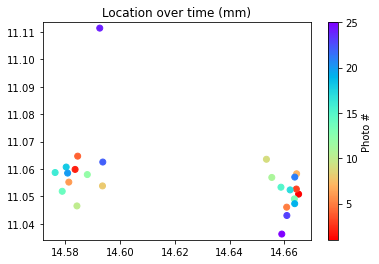

In [5]:
plt.scatter(xcoords,ycoords,c=steps,cmap='rainbow_r')
plt.colorbar(label='Photo #')
plt.title("Location over time (mm)")
plt.axis('equal')
plt.show()

In [6]:
distancex = []
for i in range(len(x0coords)):
    result = xcoords[i] - x0coords[i]
    distancex.append(result)
    
print(distancex)
print(np.mean(distancex)*1000)

[4.806518554723027e-05, -0.0008285522460926842, -6.752014160227304e-05, -0.001065444946288352, 0.00029067993164133554, -0.000823974609375, -0.00031814575195276973, -0.001420211791991477, 0.0017704010009769178, -0.0001316070556640625, -1.2588500977628314e-05, 4.806518554723027e-05, 0.0011283874511711645, -0.0009658813476551842, 0.00027351379394602304, -0.0012783050537095164, 0.0009315490722645592, -0.0011272430419921875, 0.000870895385741477, -0.0010128021240234375, 0.0008159637451168322, -0.0021068572998057533, 0.0008869171142578125, 0.00044288635253941777, -0.003575134277342684]
-0.2890777587889204


In [7]:
distancey = []
for i in range(len(y0coords)):
    result = ycoords[i] - y0coords[i]
    distancey.append(result)
    
print(distancey)
print(np.mean(distancey)*1000)

[-0.0007038116455078125, 0.00037651062011789804, 0.0007381439208984375, 0.0006774902343735789, 0.0011924743652347303, -0.0013710021972652697, -0.0013355255126956678, -0.0012668609619144178, 0.0010047912597652697, 0.0009304046630855822, -0.0015609741210926842, -0.002286529541017046, -0.0019683837890625, -0.004928970336914418, -0.0036209106445319605, -0.002490234375001066, 0.003432083129883523, -0.0017532348632816053, -0.003508758544922941, 0.0024547576904296875, 0.00185394287109375, 0.001431655883788352, -0.001986694335938566, 0.002407836914061434, -0.0027786254882808947]
-0.6024169921877842


In [8]:
thetax = np.arctan(np.mean(distancey)/np.mean(distancex))
print(thetax*180/np.pi)

64.3653638334747


In [9]:
thetay = np.arctan(np.mean(distancex)/np.mean(distancey))
print(thetay*180/np.pi)

25.6346361665253
